<a href="https://colab.research.google.com/github/ArthurCalvi/Classifieur-Bois/blob/master/Images_preprocessing_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wood Classification : preprocessing and prediction process**

In this Notebook you will configurate your GoogleDrive to work with GitHub and GoogleColab. Then you will learn about preprocessing and prediction. At the end of the notebook you will predict the class (Defect or Clearwood) of whatever image you want. 

## **Part 0 - Google Drive Access tutorial** 

In this part we define access to your Google Drive where the raw images will be stored and also access to a folder where we will save the prepared images.


*NB-1: As stated in the README if this is your first time running this notebook, please create a "Project_google_colab" folder in your google drive at the root of /My Drive.*

*NB-2: You will simply have to launch the two lines of code below, click on the generated link in order to authorize access to your google drive. Copy the generated key on the link and enter it below.*


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***First run***: The GitHub folder containing the codes, models and image directories is copied to your google drive with the following path: Goodle Drive -> Project_google_colab -> Classification-Bois.

In [ ]:
%cd /content/drive/My Drive/Project_google_colab
! git clone https://github.com/ArthurCalvi/Classifieur-Bois

/content/drive/My Drive/Project_google_colab
Cloning into 'Classifieur-Bois'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 34 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (34/34), done.


***Other executions :*** If you want to update the GitHub folder.

In [ ]:
%cd /content/drive/My Drive/Project_google_colab/Classifieur-Bois
! git pull

/content/drive/My Drive/Project_google_colab/Classifieur-Bois
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 32 (delta 21), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (32/32), done.
From https://github.com/ArthurCalvi/Classifieur-Bois
   07ed2d0..e525bc4  master     -> origin/master
   e2ea2ea..50ac544  gh-pages   -> origin/gh-pages
Updating 07ed2d0..e525bc4
Fast-forward
 Creation_of_your_dataset.ipynb | 116 +++++++++++++----------------------------
 README.md                      |  17 +++---
 2 files changed, 48 insertions(+), 85 deletions(-)


## **Part 1 - Images preprocessing**

Before giving the image to the neural network so that it emits a prediction on what the image represents, it is necessary to prepare it. Indeed, the neural network takes an input of fixed dimension: a square image of dimension 256x256 pixels. In this notebook, the images contained in the Google Drive * Raw_IMAGES * folder are prepared and saved in a new Google Drive * Prepared_IMAGES * folder.

*NB: Please note that for a notebook script to work, the previous scripts must have been run.*

### **Parameters**

In this part, we define the parameters such as the image width and the path to retrieve the images and save them.

In [ ]:
#image width in px
desired_size = 256

#Directory to retrieve raw images
access = '/content/drive/My Drive/Project_google_colab/Classifieur-Bois/IMAGES_raw'

#Directory to save preprocessed images
save = '/content/drive/My Drive/Project_google_colab/Classifieur-Bois/IMAGES_preprocessed'

### **Script**

In this part we define the function that will perform the following tasks:

1. Resize the smallest side of the image to 256 pixels
2. Crop the longest side so that it is also 256 pixels in order to obtain a square image.

The preprocessing is performed on all the images of the /IMAGES_raw folder and then saved in the /IMAGES_preprocessed folder. 


In [ ]:
#Import of the PIL image management library
from PIL import Image 

#Import of os and sys libraries to manipulate files
import sys,os

def prep_image(image):
    323/5000
    """This function takes as argument an image of any size and aspect opened
    according to the PIL Image.open method and transforms it into a square
    image of side 256 pixels. The cropping is performed such that the smallest
    side is  fixed at 256 pixels and the largest side is then cropped to obtain
    a square format."""

    #dimensions recovery
    width,height = image.size

    #smallest side recovery
    small_side = min(width,height)

    #definition of the ratio between the old and the new image
    ratio = desired_size / small_side

    #scaling
    image = image.resize((round(ratio*width), round(ratio*height)), Image.ANTIALIAS )

    #dimensions recovery
    width,height = image.size

    #definition of the region to crop
    crop_region = ( round(( width-desired_size)/2), 0 , round((width+desired_size)/2) , desired_size)

    #cropping 
    image = image.crop(crop_region)

    return image

def prep_and_save(path):
    """This function browses the images in the IMAGES_raw folder and saves it
    in the IMAGES_preprocessed folder"""

    dirs = os.listdir(path)
    i=0

    for item in dirs:
        
        super_path = path+"/"+item
        
        if os.path.isfile(super_path):
            
            image = Image.open(super_path)
            
            filename_w_ext = os.path.basename(super_path)
            filename, extension = os.path.splitext(filename_w_ext)

            image = prep_image(image)

            image.save(save+"/"+filename+"_{}.jpg".format(desired_size), 'JPEG')
            os.remove(super_path)

            i+=1

    print('{} images have been prepared and have been saved to Google Drive : My Drive/Project_google_colab/Classification-Bois/Images_preprocessed'.format(i))


prep_and_save(access)

1 images have been prepared and have been saved to Google Drive : My Drive/Project_google_colab/Classification-Bois/Images_preprocessed


## **Part 2 - Prediction with the neural network**

In this Notebook, an already trained neural network capable of distinguishing images of clearwood from images of wood containing defects *(stains, dead knots, live knots, pitch pockets and splits)* is presented.

This binary classifier has an accuracy rate of around 94% and was trained on a database of 400 images containing more than 200 wood species. Although the database is limited in size, the neural network is able to generalize to other databases satisfactorily. This good generalization is due to:

1. The great variety of species of the database.
2. The artificial augmentation operated during the learning process.
3. The artificial augmentation operated during the prediction.



### **Parameters** 

In this part you can predict the class of an image that you have stored in your google drive.

You must fill in:
1. name_img: the name of the image to predict which is located in the /IMAGES_preprocessed folder *(don't forget the .jpg extension)*.
2. nbr_images: the number of augmented images created to predict the image class. ex: nbr_images = 10.

In [ ]:
name_img = 'clearwood_256_230.jpg'
nbr_images = 10

## **Script**

In this part the prediction function is defined. This function predicts the membership class of an image from several versions of this image created by random artificial augmentation. The randomness of the prediction means that the probability that an image is a certain class can vary slightly by making several attempts.



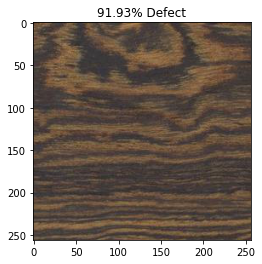

In [ ]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Imports of github personal files
from custom_functions_v1 import crop_generator, random_crop, colorize_v2

# Keras API
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.models import load_model

model = load_model('/content/drive/My Drive/Project_google_colab/Classifieur-Bois/MODEL_CNN1_bs32_ep100_augTrue_t1593511641.h5')
#print(model.summary())

def prediction(img,nbr_images):
    """ 
    Perform the prediction of the image [img] from [nbr_images] augmented
    images.
    
    INPUT :
        -img : array loaded with load_img 
        -nbr_images : integer representing the number of augmented images used
         for prediction 
        
        
    OUTPUT :
        -prediction : final prediction averaged over several images
    """
    
    # convert to numpy array
    data = img_to_array(img)
    # expand dimension to one sample
    samples = np.expand_dims(data, 0)
    
    # create data for the test
    datagen = ImageDataGenerator( fill_mode='reflect', 
                                  samplewise_center=True,
                                  samplewise_std_normalization=True,
                                  horizontal_flip=True, vertical_flip=True, 
                                  rotation_range=10, brightness_range= [0.6,1.4], 
                                  preprocessing_function = colorize_v2, 
                                  zoom_range = [1.0,1.3])
    
    batch = datagen.flow(samples, batch_size=1)
    
    #add random cropped
    prediction = []
    
    for i in range(nbr_images):
        
        img = batch.next()
        img = random_crop(img[0].astype('float32'), (224,224))
        img = np.expand_dims(img, 0)
        prediction.append(model.predict(img))
    
        
    prediction = sum(prediction)/nbr_images
    prediction = np.array(prediction).tolist()[0][0]
    
    return prediction  

path = '/content/drive/My Drive/Project_google_colab/Classifieur-Bois/IMAGES_preprocessed/'
img = load_img(path+name_img)
score = prediction(img, nbr_images)
img = mpimg.imread(path+name_img)

#Show prediction
if score>0.5:
    plt.imshow(img)
    plt.title('{0:.2%} Defect'.format(score))
else : 
    plt.imshow(img)
    plt.title('{0:.2%} Clearwood'.format(1-score))